<a href="https://colab.research.google.com/github/tlerksuthirat/lab_management/blob/main/Motorized_Upright_Microscope_Usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Replace with sheet ID
instrument_url = 'https://docs.google.com/spreadsheets/d/1WBZS1PXpkSTeA4xpV0PVBvmPP5-ZYCelRcl3WKvS_TM/edit?gid=1451272003#gid=1451272003'

sheet_id = instrument_url .split('/')[-2]  # Extract sheet ID from URL
sheet = gc.open_by_key(sheet_id)

In [6]:
#Get a list of all worksheets
worksheet_list = sheet.worksheets()

#Print the titles of all worksheets
for worksheet in worksheet_list:
    print(worksheet.title)

2026
2025
2024
Latest use
Productivity
2023
2022
2021
User list
Status


In [15]:
#Choose a specific worksheet (e.g., '2025')
worksheet = sheet.worksheet('2025')

# Task
Analyze and visualize the monthly usage of the instrument from the '2025' worksheet of the Google Sheet located at "https://docs.google.com/spreadsheets/d/1WBZS1PXpkSTeA4xpV0PVBvmPP5-ZYCelRcl3WKvS_TM/edit?gid=1451272003#gid=1451272003", including data cleaning, calculation of total usage hours, and generation of a monthly usage table and graph.

## Run data loading cell

### Subtask:
Load data from the '2025' worksheet into a DataFrame.


**Reasoning**:
The subtask requires loading data from the `worksheet` into a Pandas DataFrame. Since the `data` variable from the kernel state appears to already contain the records from the worksheet, I will use it to create the DataFrame. The first row of `data` will be used as column headers.



In [17]:
headers = data[0]
df = pd.DataFrame(data[1:], columns=headers)
print(df.head())

                              Date of use (MM/DD/YY) Start (00:00-24:00)  \
0  Motorized Upright Microscope has executed on 2...                       
1                                         1-Jan-2025                0:00   
2                                         7-Jan-2025               10:00   
3                                         8-Jan-2025               13:00   
4                                        14-Jan-2025               10:00   

  End (00:00-24:00) Duration (hr) Technique Condition              User name  \
0                                                                              
1              0:00          0:00  IF or BF      Okay  Tassanee Lerksuthirat   
2             14:45          4:45         -        OK       Wilasinee Konsue   
3             15:00          2:00         -        OK       Wilasinee Konsue   
4             14:30          4:30         -        OK       Wilasinee Konsue   

                               Note    
0                     

In [31]:
# Remove the first row (index 0) which often contains metadata or repeated headers after loading.
df_cleaned = df.iloc[1:].copy()

# Replace empty strings with NaN for proper dropping
df_cleaned.replace('', pd.NA, inplace=True)

# Drop rows where 'Date of use (MM/DD/YY)' is missing, as these are critical for time-based analysis.
column_to_check = 'Date of use (MM/DD/YY)'
df_cleaned.dropna(subset=[column_to_check], inplace=True)

# Display the head of the cleaned DataFrame
print("Cleaned DataFrame head:")
display(df_cleaned.head())

Cleaned DataFrame head:


,Date of use (MM/DD/YY),Start (00:00-24:00),End (00:00-24:00),Duration (hr),Technique,Condition,User name,Note,
1,1-Jan-2025,0:00,0:00,0:00,IF or BF,Okay,Tassanee Lerksuthirat,Demo how to fill in the log book,<NA>
2,7-Jan-2025,10:00,14:45,4:45,-,OK,Wilasinee Konsue,Image processing,<NA>
3,8-Jan-2025,13:00,15:00,2:00,-,OK,Wilasinee Konsue,Image processing,<NA>
4,14-Jan-2025,10:00,14:30,4:30,-,OK,Wilasinee Konsue,Image processing,<NA>
5,16-Jan-2025,10:00,14:40,4:40,BF,OK,Wilasinee Konsue,<NA>,<NA>


In [32]:
def time_string_to_seconds_flexible(row):
    time_str = row['Duration (hr)']

    if pd.isna(time_str) or time_str == '':
        return 0  # Handle missing or empty values

    # Ensure time_str is a string before splitting
    time_str = str(time_str).strip()

    try:
        parts = list(map(int, time_str.split(':')))

        if len(parts) == 2:
            # Assuming H:M format
            h, m = parts
            s = 0 # Seconds are 0 if only H:M is provided
        elif len(parts) == 3:
            # Assuming H:M:S format
            h, m, s = parts
        else:
            # Handle cases with unexpected number of parts, or just a single number (hours)
            if len(parts) == 1:
                h = parts[0]
                m = 0
                s = 0
            else:
                print(f"Warning: Unexpected time format '{time_str}' at index {row.name}. Returning 0.")
                return 0

        total_seconds = h * 3600 + m * 60 + s
        return total_seconds

    except ValueError:
        print(f"Warning: Could not convert time parts to integers for '{time_str}' at index {row.name}. Returning 0.")
        return 0
    except Exception as e:
        print(f"An unexpected error occurred processing '{time_str}' at index {row.name}: {e}. Returning 0.")
        return 0

# Apply the function to create 'Total Seconds' column
df_cleaned['Total Seconds'] = df_cleaned.apply(time_string_to_seconds_flexible, axis=1)

# Calculate 'Total Hours'
df_cleaned['Total Hours'] = df_cleaned['Total Seconds'] / 3600

print("DataFrame with Total Seconds and Total Hours:")
display(df_cleaned[['Date of use (MM/DD/YY)', 'Duration (hr)', 'Total Seconds', 'Total Hours']].head())

DataFrame with Total Seconds and Total Hours:


,Date of use (MM/DD/YY),Duration (hr),Total Seconds,Total Hours
1,1-Jan-2025,0:00,0,0.000000
2,7-Jan-2025,4:45,17100,4.750000
3,8-Jan-2025,2:00,7200,2.000000
4,14-Jan-2025,4:30,16200,4.500000
5,16-Jan-2025,4:40,16800,4.666667


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make a copy to avoid SettingWithCopyWarning
df_monthly_usage = df_cleaned.copy()

# Convert 'Date of use (MM/DD/YY)' to datetime objects
df_monthly_usage.loc[:, 'Date'] = pd.to_datetime(df_monthly_usage['Date of use (MM/DD/YY)'], errors='coerce')

# Drop rows where 'Date' could not be parsed (if any)
df_monthly_usage.dropna(subset=['Date'], inplace=True)

# Extract month name and numeric month for proper sorting
df_monthly_usage.loc[:, 'Month_Name'] = df_monthly_usage['Date'].dt.strftime('%B') # Full month name
df_monthly_usage.loc[:, 'Month_Num'] = df_monthly_usage['Date'].dt.month

# Group by 'User name' and 'Month' and sum 'Total Hours'
monthly_usage_summary = df_monthly_usage.groupby(['User name', 'Month_Num', 'Month_Name'])['Total Hours'].sum().reset_index()

# Sort by Month_Num to ensure chronological order
monthly_usage_summary = monthly_usage_summary.sort_values(by=['Month_Num', 'User name'])

# Display the table, pivoting to show months as columns
monthly_usage_pivot = monthly_usage_summary.pivot_table(index='User name', columns='Month_Name', values='Total Hours', fill_value=0)

# Reorder columns chronologically if needed (based on Month_Num from original data)
month_order_chronological = df_monthly_usage.sort_values('Date')['Month_Name'].unique()
monthly_usage_pivot = monthly_usage_pivot[month_order_chronological]

print("\n--- Monthly Usage Hours per User Table ---")
display(monthly_usage_pivot.round(1))


--- Monthly Usage Hours per User Table ---


Month_Name,January,February,March,April,May,June,July,August,September,October,November,December
User name,,,,,,,,,,,,
Chalisa Jaturapaktrarak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.5,1.5
Gunn Pornratananont,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Maolee Bhuwapathanapun,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.5,0.0,0.0,0.0,0.0
Pawarit Innachai,7.0,27.5,4.0,3.0,2.5,0.0,0.0,0.0,10.5,35.0,12.5,29.0
Rakkreat Wikiniyadhanee,0.0,0.0,11.5,16.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sathida Liekwannacharoen,0.0,0.0,0.0,0.0,29.0,3.0,0.0,0.0,0.0,8.0,9.0,13.8
Tassanee Lerksuthirat,0.0,0.0,2.0,3.0,14.0,0.0,0.0,0.0,0.0,11.8,1.0,0.0
Wilasinee Konsue,29.7,7.2,2.5,0.0,0.0,0.0,2.7,0.0,0.0,0.0,0.0,0.0



--- Total Usage Hours Per Month ---


,Month_Name,Total Hours
4,January,39.7
3,February,34.8
7,March,20.0
0,April,22.0
8,May,52.5
6,June,3.0
5,July,5.7
1,August,3.5
11,September,12.5
10,October,54.8


/tmp/ipython-input-4082273784.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_total_usage, x='Month_Name', y='Total Hours', palette='Paired')


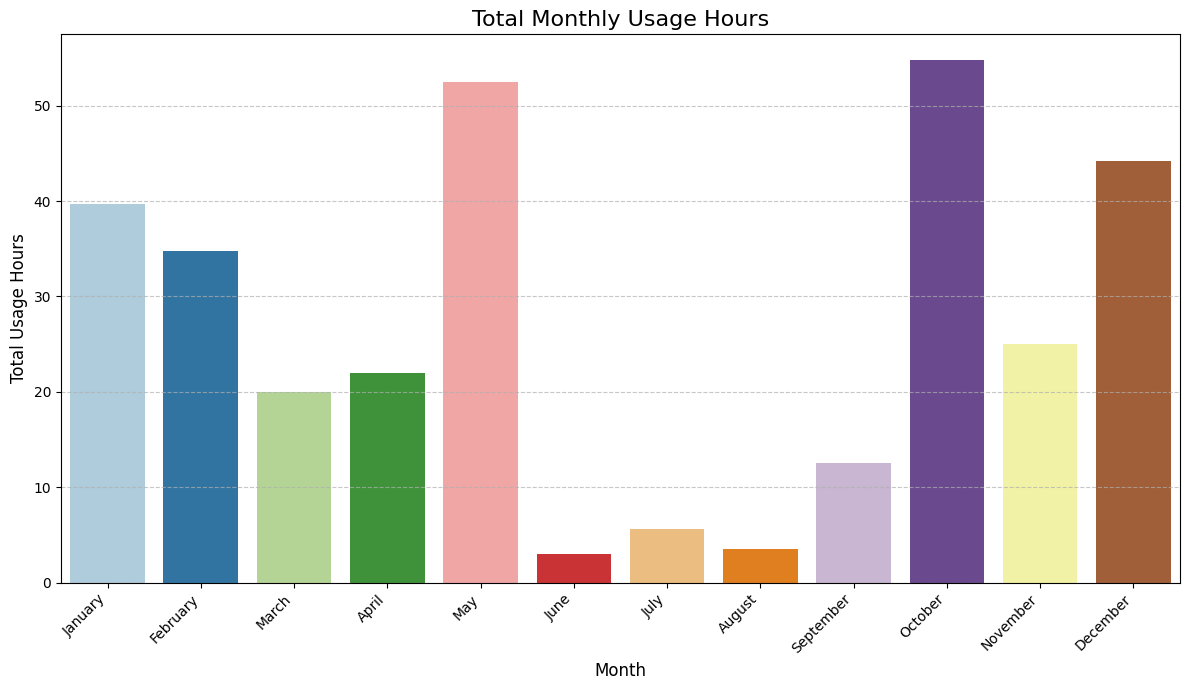

In [43]:
# Calculate the total usage hours per month
monthly_total_usage = df_monthly_usage.groupby('Month_Name')['Total Hours'].sum().reset_index()

# Reorder months chronologically for display
month_order_chronological = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_total_usage['Month_Name'] = pd.Categorical(monthly_total_usage['Month_Name'], categories=month_order_chronological, ordered=True)
monthly_total_usage = monthly_total_usage.sort_values('Month_Name')

print("\n--- Total Usage Hours Per Month ---")
display(monthly_total_usage.round(1))

# Create the bar plot for total monthly usage
plt.figure(figsize=(12, 7))
sns.barplot(data=monthly_total_usage, x='Month_Name', y='Total Hours', palette='Paired')
plt.title('Total Monthly Usage Hours', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage Hours', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

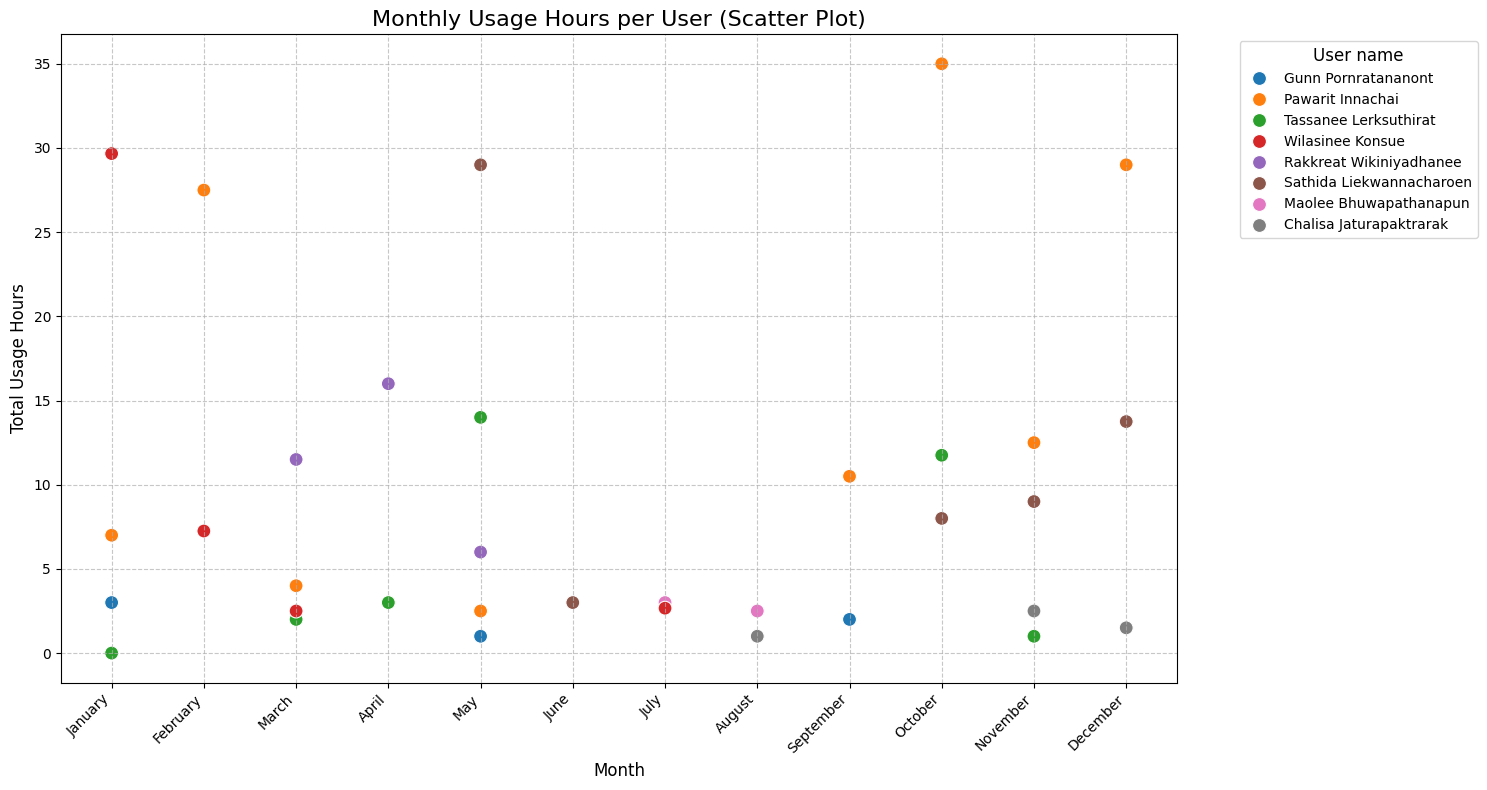

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Month_Name is a categorical type with chronological order for plotting
month_order_chronological = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_usage_summary['Month_Name'] = pd.Categorical(monthly_usage_summary['Month_Name'], categories=month_order_chronological, ordered=True)

# Sort the DataFrame by Month_Name to ensure correct order on plot
monthly_usage_summary_sorted = monthly_usage_summary.sort_values(by='Month_Name')

plt.figure(figsize=(15, 8))
sns.scatterplot(data=monthly_usage_summary_sorted, x='Month_Name', y='Total Hours', hue='User name', s=100, palette='tab10')
plt.title('Monthly Usage Hours per User (Scatter Plot)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage Hours', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='User name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This scatter plot visualizes the monthly usage hours for each user. The x-axis represents the months, and the y-axis shows the total usage hours. Each point on the plot corresponds to a specific user's total hours for a given month, with different colors distinguishing between users. This allows you to observe individual user trends and identify any outliers or consistent usage patterns across the months.

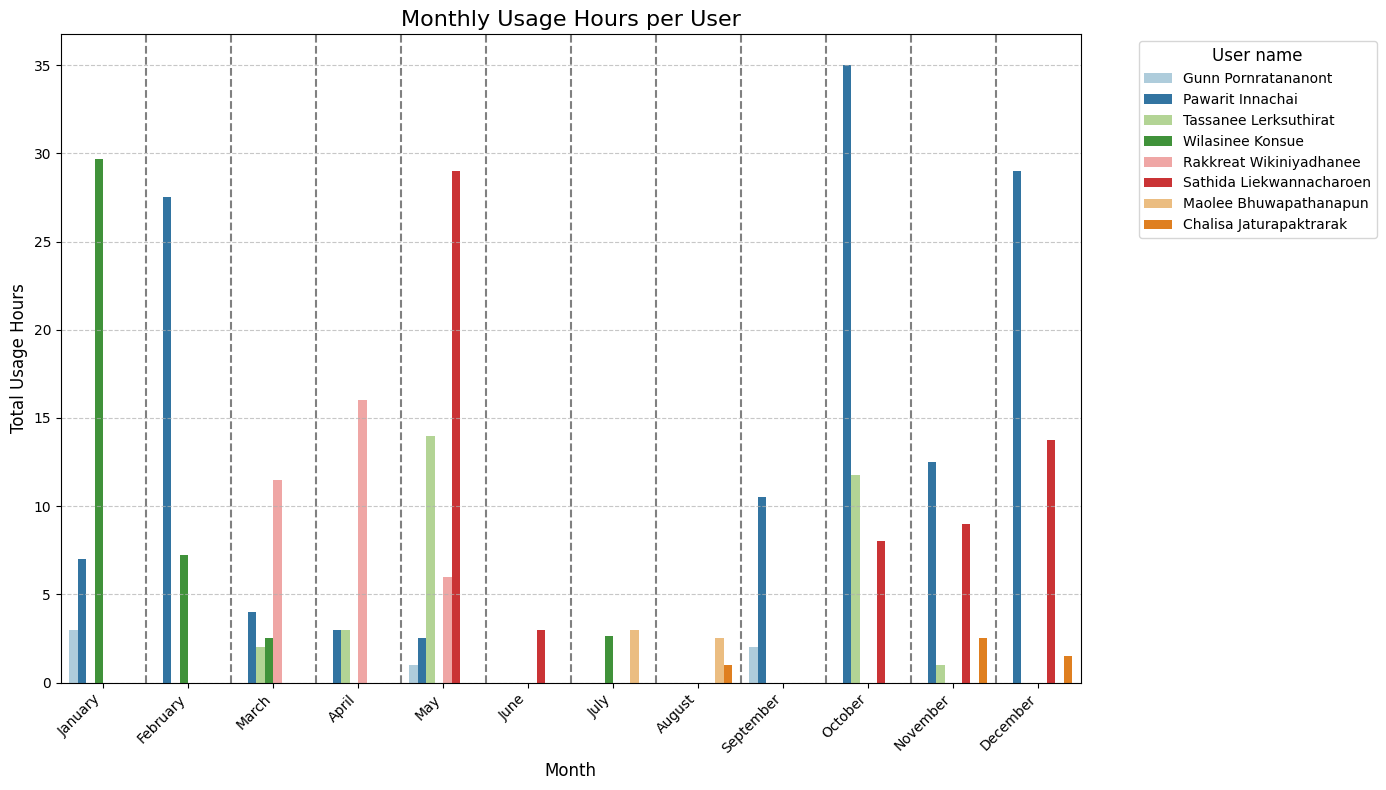

In [45]:
# Create the bar plot for monthly usage per user
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=monthly_usage_summary, x='Month_Name', y='Total Hours', hue='User name', palette='Paired')
plt.title('Monthly Usage Hours per User', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Usage Hours', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='User name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add dashed lines to separate months
# The number of unique months determines where to place the lines
num_months = len(monthly_usage_summary['Month_Name'].unique())
for i in range(num_months - 1):
    ax.axvline(x=i + 0.5, color='gray', linestyle='--', linewidth=1.5)

plt.tight_layout()
plt.show()